Importing the libraries

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dividing the dataset into independent variables and target variable

In [340]:
df=pd.read_excel('advertising_sales_data.xlsx')
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values


checking if missing values exist

In [341]:
print(df.head())
print(df.info())

print('\nMissing values are :')
print(df.isnull().sum())

  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None

Missing values are :
Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


Handling missing values whihc are present in radio

In [342]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
#imputer.fit(X)
X=imputer.fit_transform(X)
#print(X)

checking if outliers are present

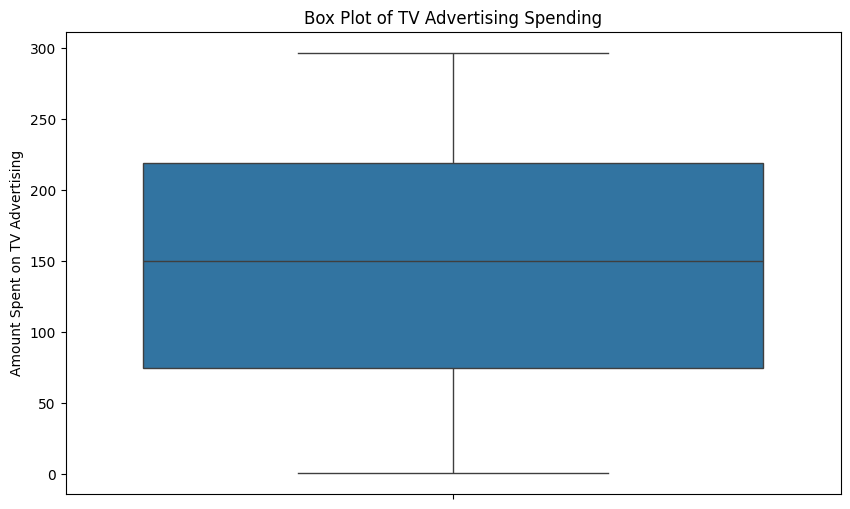

In [343]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['TV'])
plt.title('Box Plot of TV Advertising Spending')
plt.ylabel('Amount Spent on TV Advertising')
plt.show()

using mean as outliers doesnt exist

In [344]:
m=df['TV'].mean()
print(m)
print(df['Radio'].mean())
print(df['Newspaper'].median())

147.0425
23.26060606060606
25.75


Correlation Matrix

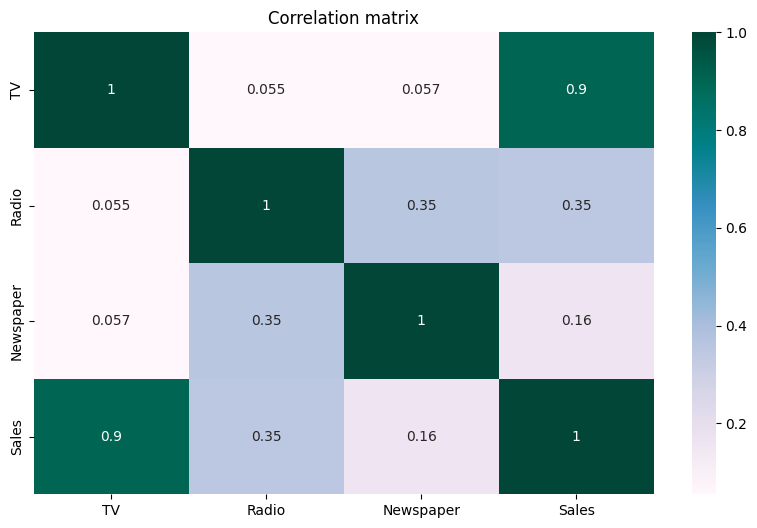

In [345]:
num_df=df.select_dtypes(include=['int64','float64'])
corr=num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='PuBuGn')
plt.title('Correlation matrix')
plt.show()

As we have 3 features reducing fetures to 1 by pca to plot the regression line

In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [347]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Training the linear regression model

In [348]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_pca,y_train)

LinearRegression()

printing the shapes to check if both sets are in same dimensions

In [362]:
y_pred=regressor.predict(X_test_pca)
print("X_train shape:", X_train_pca.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_pca.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 1)
y_train shape: (160,)
X_test shape: (40, 1)
y_test shape: (40,)


Visualizing training model by plotting regressor line

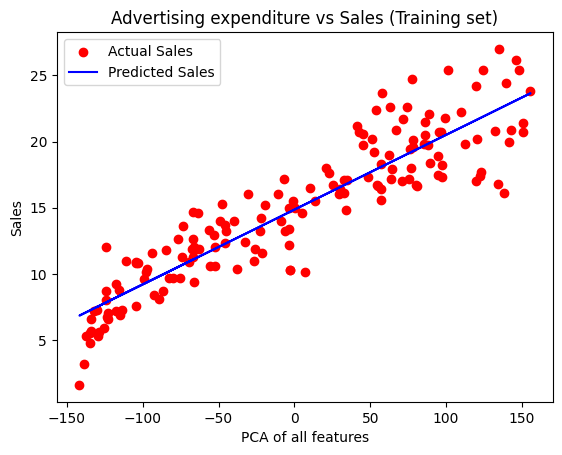

In [350]:
plt.scatter(X_train_pca,y_train, color='red',label='Actual Sales')
plt.plot(X_train_pca, regressor.predict(X_train_pca), color='blue',label='Predicted Sales')
plt.title('Advertising expenditure vs Sales (Training set)')
plt.xlabel('PCA of all features')
plt.ylabel('Sales')
plt.legend()
plt.show()

Visualizing the model's predictions against the actual sales values

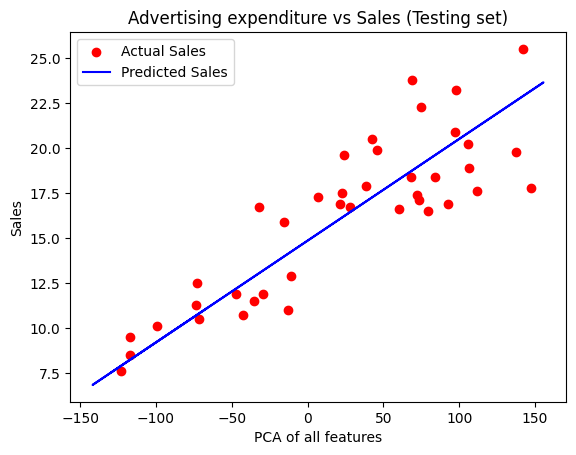

In [351]:
plt.scatter(X_test_pca, y_test, color='red',label='Actual Sales')
plt.plot(X_train_pca, regressor.predict(X_train_pca), color='blue',label='Predicted Sales')
plt.title('Advertising expenditure vs Sales (Testing set)')
plt.xlabel('PCA of all features')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [352]:
new = np.array([[200, 40, 50]])
new_pca = pca.transform(new)

predicted_sales = regressor.predict(new_pca)
print(predicted_sales)

[18.14469818]


NORMALIZING THE DATA

In [353]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=MinMaxScaler(feature_range=(-1, 1))
X_train_nor=sc.fit_transform(X_train)
X_test_nor=sc.transform(X_test)

sc_y = MinMaxScaler(feature_range=(0, 1))
y_train_nor = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test_nor = sc_y.transform(y_test.reshape(-1, 1))
print(X_train_nor)
print(X_test_nor)

X_train_nor_pca = pca.fit_transform(X_train_nor)
X_test_nor_pca = pca.transform(X_test_nor)

[[-0.91613121 -0.98380567 -0.49701789]
 [-0.39330402 -0.98785425 -0.54473161]
 [-0.87825499 -0.51012146 -0.54075547]
 [ 0.37571863  0.33198381 -0.09145129]
 [-0.95536016  0.13765182 -0.18290258]
 [-0.00845451 -0.05827506 -0.62624254]
 [-0.47582009  0.89473684 -0.32007952]
 [ 0.53736896  0.52631579 -0.36978131]
 [ 0.38180588  0.82591093 -0.61630219]
 [ 0.54751437  0.30769231  0.46918489]
 [ 0.9546838   0.71255061  0.01192843]
 [-0.17213392  0.40080972 -0.75944334]
 [-0.87352046 -0.35222672 -0.56262425]
 [ 0.23030098  0.87044534  0.1610338 ]
 [ 0.79168076 -0.1902834  -1.        ]
 [ 0.11531958 -0.5951417  -0.65606362]
 [ 0.47311464 -0.78137652 -0.4612326 ]
 [-0.83564423 -0.55465587 -0.41550696]
 [ 0.56509976 -0.65182186 -0.83300199]
 [-0.71389922  0.048583   -0.59840954]
 [-0.06323977 -0.42105263 -0.49701789]
 [-0.06256341 -0.41295547 -0.80318091]
 [-0.96821102  0.21052632 -0.81908549]
 [ 0.98106189  0.12145749 -0.97017893]
 [ 0.89854582  0.60323887  0.10337972]
 [-0.94589111  0.97975709

training model on normalised data

In [354]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_nor_pca,y_train_nor)
y_pred_nor = regressor.predict(X_test_nor_pca)

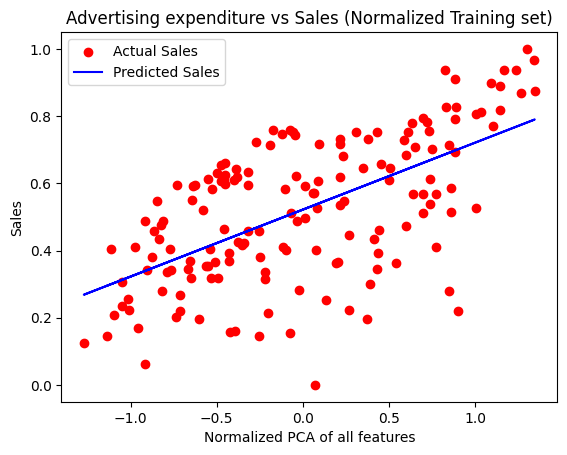

In [355]:
plt.scatter(X_train_nor_pca,y_train_nor, color='red',label='Actual Sales')
plt.plot(X_train_nor_pca, regressor.predict(X_train_nor_pca), color='blue',label='Predicted Sales')
plt.title('Advertising expenditure vs Sales (Normalized Training set)')
plt.xlabel('Normalized PCA of all features')
plt.ylabel('Sales')
plt.legend()
plt.show()

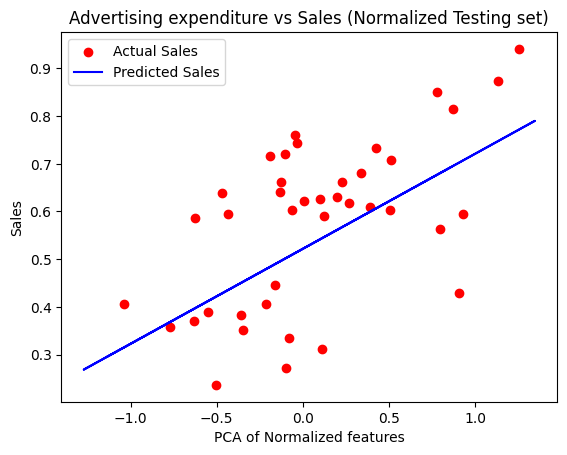

In [356]:
plt.scatter(X_test_nor_pca,y_test_nor, color='red',label='Actual Sales')
plt.plot(X_train_nor_pca, regressor.predict(X_train_nor_pca), color='blue',label='Predicted Sales')
plt.title('Advertising expenditure vs Sales (Normalized Testing set)')
plt.xlabel('PCA of Normalized features')
plt.ylabel('Sales')
plt.legend()
plt.show()

BUILDING MODEL USING ONLY RADIO AND NEWSPAPER

In [357]:
W = np.delete(X, 0, axis=1)
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
W_train, W_test, y_train, y_test = train_test_split(W, y, test_size=0.2, random_state=1)

In [358]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
W_train_pca = pca.fit_transform(W_train)
W_test_pca = pca.transform(W_test)

In [359]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(W_train_pca,y_train)

LinearRegression()

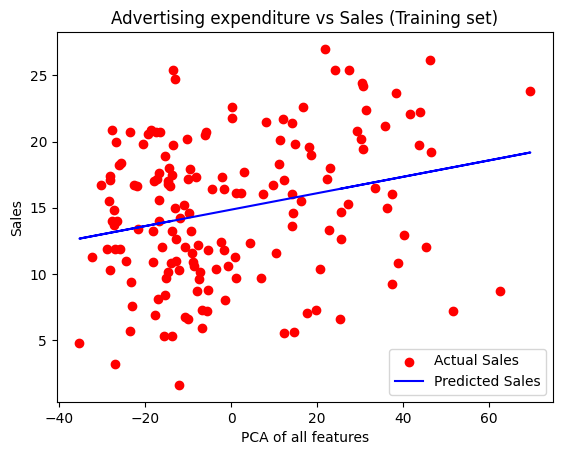

In [360]:
plt.scatter(W_train_pca,y_train, color='red',label='Actual Sales')
plt.plot(W_train_pca, regressor.predict(W_train_pca), color='blue',label='Predicted Sales')
plt.title('Advertising expenditure vs Sales (Training set)')
plt.xlabel('PCA of all features')
plt.ylabel('Sales')
plt.legend()
plt.show()

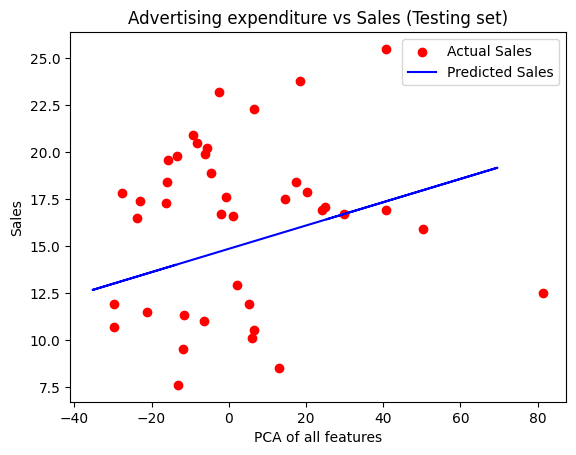

In [361]:
plt.scatter(W_test_pca,y_test, color='red',label='Actual Sales')
plt.plot(W_train_pca, regressor.predict(W_train_pca), color='blue',label='Predicted Sales')
plt.title('Advertising expenditure vs Sales (Testing set)')
plt.xlabel('PCA of all features')
plt.ylabel('Sales')
plt.legend()
plt.show()